In [1]:
library(GLMsData)
library(statmod)
library(MASS)
library(splines)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(sheep)

In [3]:
str(sheep)

'data.frame':	64 obs. of  2 variables:
 $ Weight: num  22.1 26.2 33.2 34.3 49 52.6 27.6 31 32.6 44.6 ...
 $ Energy: num  1.31 1.27 1.25 1.14 1.78 1.7 1.39 1.47 1.75 2.25 ...


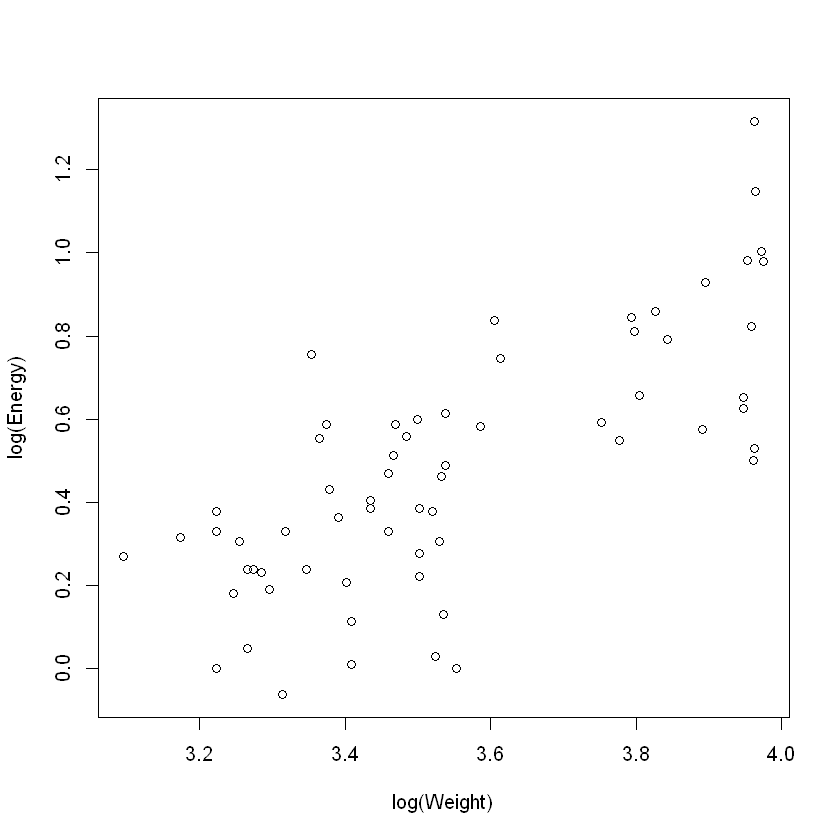

In [6]:
plot(log(Energy) ~ log(Weight), data=sheep)

In [7]:
glm.1 <- glm(Energy ~ log(Weight), data=sheep, family = Gamma(link="log"))

In [8]:
coef(summary(glm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-2.6626688,0.35508921,-7.498591,2.936933e-10
log(Weight),0.8911232,0.09979501,8.929536,9.816901e-13


In [9]:
anova(glm.1, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,63,5.898109,NA,NA
log(Weight),1,3.376256,62,2.521853,83.91876,3.94399e-13


In [11]:
gof.dev <- deviance(glm.1)
gof.pearson <- sum(glm.1$weights * glm.1$residuals^2)

pchisq(gof.dev, df=df.residual(glm.1), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.1), lower.tail = FALSE)

gof.dev / df.residual(glm.1)
gof.pearson / df.residual(glm.1)

[1] 2.521853

[1] 1

[1] 1

[1] 0.04067505

[1] 0.04023243


	Shapiro-Wilk normality test

data:  qr1
W = 0.98438, p-value = 0.5955


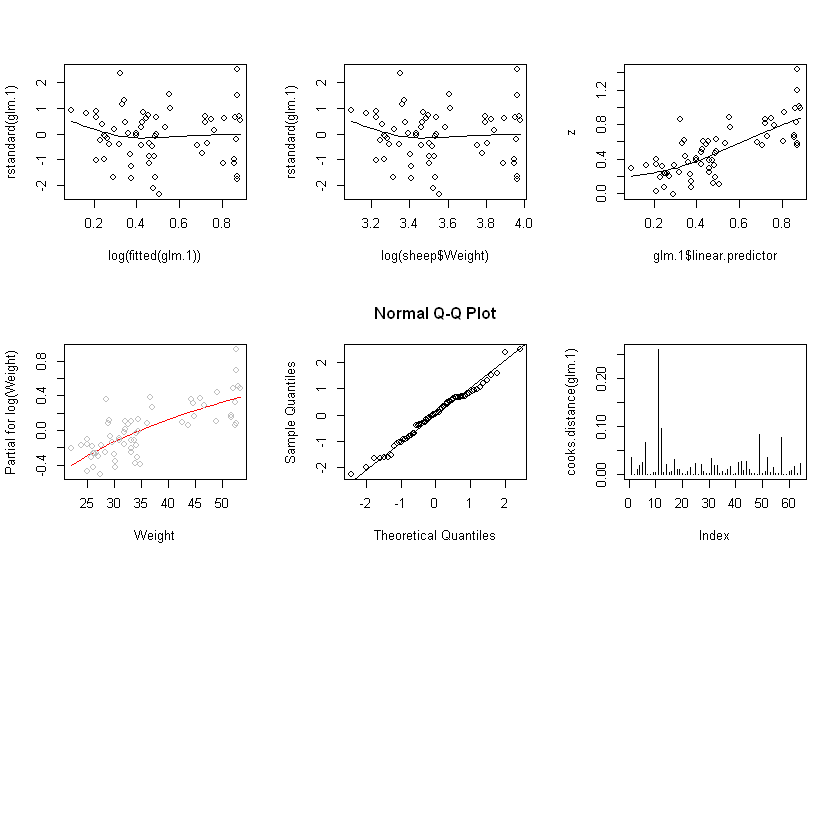

In [12]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(glm.1) ~ log(fitted(glm.1)))
scatter.smooth(rstandard(glm.1) ~ log(sheep$Weight))
z <- resid(glm.1, type="working") + glm.1$linear.predictor
scatter.smooth(z ~ glm.1$linear.predictor)
termplot(glm.1, partial.resid = TRUE, terms="log(Weight)")
qqnorm(qr1 <- qresid(glm.1))
qqline(qr1)
plot(cooks.distance(glm.1), type="h")
shapiro.test(qr1)

In [13]:
colSums(influence.measures(glm.1)$is.inf)

dfb.1_ dfb.l(W)    dffit    cov.r   cook.d      hat 
       0        0        1        3        0        0

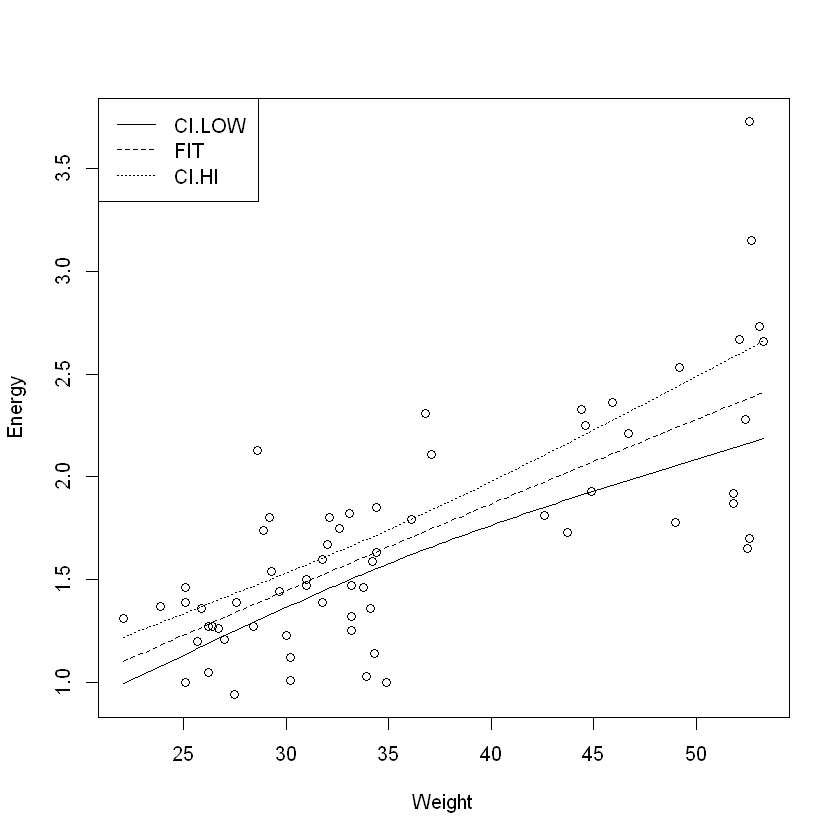

In [15]:
newWeight <- seq(min(sheep$Weight), max(sheep$Weight), length=100)
fit <- predict(glm.1, newdata=data.frame(Weight=newWeight), se.fit=TRUE)
t.star <- qt(0.975, df=df.residual(glm.1))
ci.lo <- exp(fit$fit - t.star*fit$se.fit)
ci.hi <- exp(fit$fit + t.star*fit$se.fit)

plot(Energy ~ Weight, data=sheep)
lines(ci.lo ~ newWeight, lty=1)
lines(exp(fit$fit) ~ newWeight, lty=2)
lines(ci.hi ~ newWeight, lty=3)
legend("topleft", lty=c(1, 2, 3), legend=c("CI.LOW", "FIT", "CI.HI"))